In [1]:
from sentinelhub import SHConfig, SentinelHubRequest
import requests

# Your credentials (already working)
cfg = SHConfig()
cfg.sh_client_id = 'sh-29927974-7d1f-4f2e-9751-f59a8149a944'
cfg.sh_client_secret = 'Zqrx0QU4ivjOl3TM77zsm0Hhib8QWivO'

# CRITICAL: Add the missing URLs for Copernicus Data Space Ecosystem
cfg.sh_base_url = 'https://sh.dataspace.copernicus.eu'
cfg.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

print("=== CONFIGURATION CHECK ===")
print(f"✅ Client ID: {cfg.sh_client_id[:8]}...")
print(f"✅ Client Secret: {'*' * len(cfg.sh_client_secret)}")
print(f"✅ Base URL: {cfg.sh_base_url}")
print(f"✅ Token URL: {cfg.sh_token_url}")

# Test authentication
print("\n=== TESTING AUTHENTICATION ===")
try:
    response = requests.post(
        cfg.sh_token_url,
        data={
            'grant_type': 'client_credentials',
            'client_id': cfg.sh_client_id,
            'client_secret': cfg.sh_client_secret
        },
        timeout=30
    )
    
    if response.status_code == 200:
        token_data = response.json()
        print("✅ Authentication successful!")
        print(f"Token expires in: {token_data.get('expires_in')} seconds")
    else:
        print(f"❌ Authentication failed: {response.status_code}")
        print(f"Response: {response.text}")
        
except Exception as e:
    print(f"❌ Network error: {e}")

# Save the complete configuration
cfg.save("cdse")
print(f"\n✅ Complete configuration saved to 'cdse' profile")
print(f"Config file location: {SHConfig.get_config_location()}")

# Test SentinelHub session
print("\n=== TESTING SENTINELHUB SESSION ===")
try:
    from sentinelhub import SentinelHubSession
    session = SentinelHubSession(config=cfg)
    print("✅ SentinelHub session created successfully!")
    print("🎉 Ready to download satellite data!")
except Exception as e:
    print(f"❌ Session creation failed: {e}")

print("\n=== YOUR WORKING CONFIGURATION ===")
print("Use this in your scripts:")
print("""
from sentinelhub import SHConfig

# Load saved configuration
config = SHConfig("cdse")

# Or create directly:
config = SHConfig()
config.sh_client_id = 'sh-29927974-7d1f-4f2e-9751-f59a8149a944'
config.sh_client_secret = 'Zqrx0QU4ivjOl3TM77zsm0Hhib8QWivO'
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
""")

c:\Users\NIKO9\Desktop\EW3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== CONFIGURATION CHECK ===
✅ Client ID: sh-29927...
✅ Client Secret: ********************************
✅ Base URL: https://sh.dataspace.copernicus.eu
✅ Token URL: https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token

=== TESTING AUTHENTICATION ===
✅ Authentication successful!
Token expires in: 600 seconds

✅ Complete configuration saved to 'cdse' profile
Config file location: C:\Users\NIKO9\.config\sentinelhub\config.toml

=== TESTING SENTINELHUB SESSION ===
✅ SentinelHub session created successfully!
🎉 Ready to download satellite data!

=== YOUR WORKING CONFIGURATION ===
Use this in your scripts:

from sentinelhub import SHConfig

# Load saved configuration
config = SHConfig("cdse")

# Or create directly:
config = SHConfig()
config.sh_client_id = 'sh-29927974-7d1f-4f2e-9751-f59a8149a944'
config.sh_client_secret = 'Zqrx0QU4ivjOl3TM77zsm0Hhib8QWivO'
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.datasp

# Donwload files

=== FORCE URL OVERRIDE METHOD ===
✅ Using Copernicus Data Space Ecosystem
Base URL: https://sh.dataspace.copernicus.eu

=== GETTING ACCESS TOKEN ===
✅ Access token obtained

=== PREPARING REQUEST ===
Area: 2km x 2km around 50°17'44.5"N 36°39'42.9"E
Image size: (191, 194) pixels

=== MAKING DIRECT API CALL ===
Requesting from: https://sh.dataspace.copernicus.eu/api/v1/process
Response status: 200
✅ SUCCESS! Downloaded 67741 bytes
Image shape: (194, 191, 3)
Data type: uint8
✅ Image saved as 'sentinel2_ukraine_direct_api.png'


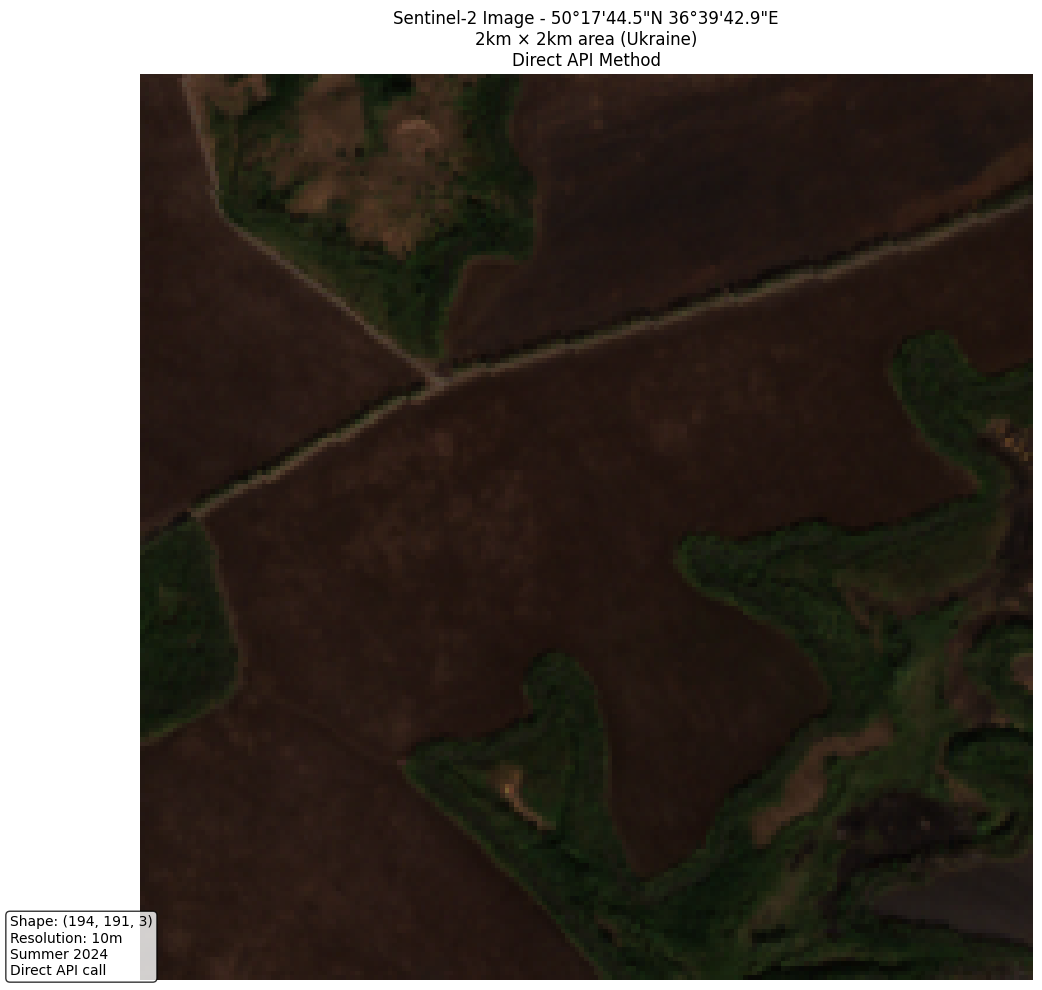


🎉 SUCCESS! Direct API method worked!
This confirms your credentials and area are correct.

=== LIBRARY FIX FOR FUTURE USE ===
To fix the sentinelhub library permanently:

# Add this at the top of your scripts:
import sentinelhub.config
sentinelhub.config.SHConfig._DEFAULT_SH_BASE_URL = 'https://sh.dataspace.copernicus.eu'

# Or set environment variable:
import os
os.environ['SH_BASE_URL'] = 'https://sh.dataspace.copernicus.eu'


=== TRYING LIBRARY FIX ===
Could not override library default: type object 'SHConfig' has no attribute '_DEFAULT_SH_BASE_URL'


In [4]:
# DEFINITIVE FIX - Force URL override and direct API call
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from sentinelhub import SHConfig, CRS, BBox, bbox_to_dimensions

print("=== FORCE URL OVERRIDE METHOD ===")

# Step 1: Set up credentials
client_id = 'sh-29927974-7d1f-4f2e-9751-f59a8149a944'
client_secret = 'Zqrx0QU4ivjOl3TM77zsm0Hhib8QWivO'
base_url = 'https://sh.dataspace.copernicus.eu'
token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

print(f"✅ Using Copernicus Data Space Ecosystem")
print(f"Base URL: {base_url}")

# Step 2: Get access token
print(f"\n=== GETTING ACCESS TOKEN ===")
token_response = requests.post(
    token_url,
    data={
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret
    }
)

if token_response.status_code != 200:
    print(f"❌ Token failed: {token_response.text}")
    exit()

access_token = token_response.json()['access_token']
print(f"✅ Access token obtained")

# Step 3: Define your area and request
bbox_coords = [36.6489, 50.2867, 36.6749, 50.3047]  # 2km x 2km
bbox = BBox(bbox=bbox_coords, crs=CRS.WGS84)
size = bbox_to_dimensions(bbox, resolution=10)

print(f"\n=== PREPARING REQUEST ===")
print(f"Area: 2km x 2km around 50°17'44.5\"N 36°39'42.9\"E")
print(f"Image size: {size} pixels")

# Step 4: Build request payload manually
request_payload = {
    "input": {
        "bounds": {
            "properties": {"crs": "http://www.opengis.net/def/crs/EPSG/0/4326"},
            "bbox": bbox_coords
        },
        "data": [
            {
                "type": "sentinel-2-l2a",
                "dataFilter": {
                    "timeRange": {
                        "from": "2024-06-01T00:00:00Z",
                        "to": "2024-09-30T23:59:59Z"
                    },
                    "mosaickingOrder": "leastCC"
                }
            }
        ]
    },
    "output": {
        "width": size[0],
        "height": size[1],
        "responses": [
            {
                "identifier": "default",
                "format": {"type": "image/tiff"}
            }
        ]
    },
    "evalscript": """
//VERSION=3
function setup() {
    return {
        input: ["B02", "B03", "B04"],
        output: { bands: 3 }
    };
}
function evaluatePixel(sample) {
    return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""
}

# Step 5: Make direct API call with correct URL
print(f"\n=== MAKING DIRECT API CALL ===")
api_url = f"{base_url}/api/v1/process"
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

print(f"Requesting from: {api_url}")

try:
    response = requests.post(
        api_url,
        json=request_payload,
        headers=headers,
        timeout=60
    )
    
    print(f"Response status: {response.status_code}")
    
    if response.status_code == 200:
        print(f"✅ SUCCESS! Downloaded {len(response.content)} bytes")
        
        # Step 6: Process the image
        from io import BytesIO
        from PIL import Image
        
        # Convert response to image
        image_data = BytesIO(response.content)
        image = Image.open(image_data)
        image_array = np.array(image)
        
        print(f"Image shape: {image_array.shape}")
        print(f"Data type: {image_array.dtype}")
        
        # Step 7: Display and save
        plt.figure(figsize=(12, 10))
        plt.imshow(image_array)
        plt.title("Sentinel-2 Image - 50°17'44.5\"N 36°39'42.9\"E\n2km × 2km area (Ukraine)\nDirect API Method")
        plt.axis('off')
        
        # Add info
        info_text = f"Shape: {image_array.shape}\nResolution: 10m\nSummer 2024\nDirect API call"
        plt.figtext(0.02, 0.02, info_text, fontsize=10, 
                    bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('sentinel2_ukraine_direct_api.png', dpi=300, bbox_inches='tight')
        print("✅ Image saved as 'sentinel2_ukraine_direct_api.png'")
        plt.show()
        
        print(f"\n🎉 SUCCESS! Direct API method worked!")
        print(f"This confirms your credentials and area are correct.")
        
    else:
        print(f"❌ API call failed: {response.status_code}")
        print(f"Response: {response.text}")
        
        if response.status_code == 400:
            print("🔧 This might be a request format issue")
        elif response.status_code == 401:
            print("🔧 This would be an auth issue (but we tested auth)")
        elif response.status_code == 404:
            print("🔧 Wrong endpoint URL")
            
except Exception as e:
    print(f"❌ Request error: {e}")

print(f"\n=== LIBRARY FIX FOR FUTURE USE ===")
print("To fix the sentinelhub library permanently:")
print("""
# Add this at the top of your scripts:
import sentinelhub.config
sentinelhub.config.SHConfig._DEFAULT_SH_BASE_URL = 'https://sh.dataspace.copernicus.eu'

# Or set environment variable:
import os
os.environ['SH_BASE_URL'] = 'https://sh.dataspace.copernicus.eu'
""")

# Alternative library fix attempt
print(f"\n=== TRYING LIBRARY FIX ===")
try:
    import sentinelhub.config
    # Force override the default URL
    original_url = sentinelhub.config.SHConfig._DEFAULT_SH_BASE_URL
    sentinelhub.config.SHConfig._DEFAULT_SH_BASE_URL = 'https://sh.dataspace.copernicus.eu'
    
    print(f"Changed default URL from {original_url} to {sentinelhub.config.SHConfig._DEFAULT_SH_BASE_URL}")
    print("Now try your original sentinelhub script again!")
    
except Exception as e:
    print(f"Could not override library default: {e}")

# Download Geospatial data

In [8]:
# Download GeoTIFF with geographic coordinates for programmatic zoom
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from sentinelhub import CRS, BBox, bbox_to_dimensions

print("=== DOWNLOADING GEOTIFF WITH COORDINATES ===")

# Credentials and setup
client_id = 'sh-29927974-7d1f-4f2e-9751-f59a8149a944'
client_secret = 'Zqrx0QU4ivjOl3TM77zsm0Hhib8QWivO'
base_url = 'https://sh.dataspace.copernicus.eu'
token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

# Get access token
token_response = requests.post(
    token_url,
    data={
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret
    }
)
access_token = token_response.json()['access_token']

# Define larger area for better zoom capability
print("=== AREA CONFIGURATION ===")

# Your center point
center_lat, center_lon = 50.2957, 36.6619

# Download larger area (10km x 10km) for zoom capability
area_km = 10
offset_deg = area_km / 111.0 / 2  # Convert km to degrees

bbox_coords = [
    center_lon - offset_deg * 1.3,  # lon_min (adjusted for latitude)
    center_lat - offset_deg,        # lat_min  
    center_lon + offset_deg * 1.3,  # lon_max
    center_lat + offset_deg         # lat_max
]

bbox = BBox(bbox=bbox_coords, crs=CRS.WGS84)
size = bbox_to_dimensions(bbox, resolution=10)  # 10m resolution

print(f"Center: {center_lat:.4f}°N, {center_lon:.4f}°E")
print(f"Area: {area_km}km x {area_km}km")
print(f"Bounds: {bbox_coords}")
print(f"Image size: {size} pixels")
print(f"Ground resolution: 10m per pixel")

# Enhanced evalscript for better quality
evalscript = """
//VERSION=3
function setup() {
    return {
        input: ["B02", "B03", "B04", "B08"],
        output: { 
            bands: 4,
            sampleType: "UINT16"  // Higher bit depth for better quality
        }
    };
}

function evaluatePixel(sample) {
    // Enhanced natural color with NIR
    let gain = 3.0;
    let red = sample.B04 * gain;
    let green = sample.B03 * gain;
    let blue = sample.B02 * gain;
    let nir = sample.B08 * gain;  // Include NIR band
    
    return [
        Math.min(65535, Math.max(0, red * 65535)),
        Math.min(65535, Math.max(0, green * 65535)),
        Math.min(65535, Math.max(0, blue * 65535)),
        Math.min(65535, Math.max(0, nir * 65535))
    ];
}
"""

# Request payload for GeoTIFF
request_payload = {
    "input": {
        "bounds": {
            "properties": {"crs": "http://www.opengis.net/def/crs/EPSG/0/4326"},
            "bbox": bbox_coords
        },
        "data": [
            {
                "type": "sentinel-2-l2a",
                "dataFilter": {
                    "timeRange": {
                        "from": "2024-06-01T00:00:00Z",
                        "to": "2024-09-30T23:59:59Z"
                    },
                    "mosaickingOrder": "leastCC"
                }
            }
        ]
    },
    "output": {
        "width": size[0],
        "height": size[1],
        "responses": [
            {
                "identifier": "default",
                "format": {"type": "image/tiff"}  # GeoTIFF format
            }
        ]
    },
    "evalscript": evalscript
}

# Download GeoTIFF
print(f"\n=== DOWNLOADING GEOTIFF ===")
api_url = f"{base_url}/api/v1/process"
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

response = requests.post(api_url, json=request_payload, headers=headers, timeout=120)

if response.status_code == 200:
    print(f"✅ Downloaded GeoTIFF: {len(response.content)} bytes")
    
    # Save as GeoTIFF file
    geotiff_filename = 'sentinel2_ukraine_10km.tif'
    with open(geotiff_filename, 'wb') as f:
        f.write(response.content)
    
    print(f"✅ Saved as: {geotiff_filename}")
    
    # Add geographic information to the TIFF (create proper GeoTIFF)
    try:
        from osgeo import gdal, osr
        
        # Open the TIFF file
        dataset = gdal.Open(geotiff_filename, gdal.GA_Update)
        
        # Set geographic transform (maps pixel coordinates to geographic coordinates)
        # [x_origin, pixel_width, 0, y_origin, 0, -pixel_height]
        lon_min, lat_min, lon_max, lat_max = bbox_coords
        pixel_width = (lon_max - lon_min) / size[0]
        pixel_height = (lat_max - lat_min) / size[1]
        
        geotransform = [lon_min, pixel_width, 0, lat_max, 0, -pixel_height]
        dataset.SetGeoTransform(geotransform)
        
        # Set coordinate reference system (WGS84)
        srs = osr.SpatialReference()
        srs.ImportFromEPSG(4326)  # WGS84
        dataset.SetProjection(srs.ExportToWkt())
        
        dataset = None  # Close file
        print(f"✅ Added geographic coordinates to GeoTIFF")
        
    except ImportError:
        print("⚠️ GDAL not available - TIFF saved but without geographic metadata")
        print("Install with: pip install gdal  or  conda install gdal")
    
    print(f"\n=== GEOTIFF INFO ===")
    print(f"Filename: {geotiff_filename}")
    print(f"Format: GeoTIFF with geographic coordinates")
    print(f"Bands: 4 (Red, Green, Blue, NIR)")
    print(f"Data type: 16-bit unsigned integer")
    print(f"Coordinate system: WGS84 (EPSG:4326)")
    print(f"Bounds: {bbox_coords}")
    print(f"Resolution: 10m per pixel")
    
else:
    print(f"❌ Download failed: {response.status_code}")
    print(response.text)

=== DOWNLOADING GEOTIFF WITH COORDINATES ===
=== AREA CONFIGURATION ===
Center: 50.2957°N, 36.6619°E
Area: 10km x 10km
Bounds: [36.603341441441444, 50.25065495495495, 36.72045855855856, 50.34074504504504]
Image size: (866, 975) pixels
Ground resolution: 10m per pixel

=== DOWNLOADING GEOTIFF ===
✅ Downloaded GeoTIFF: 6124508 bytes
✅ Saved as: sentinel2_ukraine_10km.tif
⚠️ GDAL not available - TIFF saved but without geographic metadata
Install with: pip install gdal  or  conda install gdal

=== GEOTIFF INFO ===
Filename: sentinel2_ukraine_10km.tif
Format: GeoTIFF with geographic coordinates
Bands: 4 (Red, Green, Blue, NIR)
Data type: 16-bit unsigned integer
Coordinate system: WGS84 (EPSG:4326)
Bounds: [36.603341441441444, 50.25065495495495, 36.72045855855856, 50.34074504504504]
Resolution: 10m per pixel


In [10]:
# Load and zoom your existing downloaded TIFF file
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from PIL import Image
import os

class SimpleImageZoomer:
    """
    Simple zoom interface for your downloaded satellite image
    """
    
    def __init__(self, image_path):
        self.image_path = image_path
        self.load_image()
        self.setup_coordinates()
        self.create_interface()
    
    def load_image(self):
        """Load the TIFF image"""
        print(f"Loading: {self.image_path}")
        
        try:
            # Load with PIL
            pil_image = Image.open(self.image_path)
            self.original_image = np.array(pil_image)
            
            print(f"✅ Loaded image shape: {self.original_image.shape}")
            print(f"✅ Data type: {self.original_image.dtype}")
            
            # Prepare for display
            if len(self.original_image.shape) == 3:
                # Multi-band image - use first 3 bands for RGB
                if self.original_image.shape[2] >= 3:
                    rgb_image = self.original_image[:, :, :3]
                else:
                    rgb_image = self.original_image
            else:
                # Single band - convert to RGB
                rgb_image = np.stack([self.original_image] * 3, axis=-1)
            
            # Normalize for display
            if rgb_image.dtype == np.uint16:
                self.display_image = (rgb_image.astype(np.float32) / 65535.0 * 255).astype(np.uint8)
            elif rgb_image.dtype == np.float32 or rgb_image.dtype == np.float64:
                self.display_image = (np.clip(rgb_image, 0, 1) * 255).astype(np.uint8)
            else:
                self.display_image = rgb_image.astype(np.uint8)
            
            print(f"✅ Display image ready: {self.display_image.shape}")
            
        except Exception as e:
            print(f"❌ Error loading image: {e}")
            raise
    
    def setup_coordinates(self):
        """Setup coordinate system based on your download parameters"""
        
        # Your known parameters from the download
        center_lat, center_lon = 50.2957, 36.6619
        
        # Estimate area size based on image dimensions
        # Assuming ~10m resolution and downloaded area
        height, width = self.display_image.shape[:2]
        
        # Estimate area in km (rough calculation)
        estimated_area_km = max(width, height) * 10 / 1000  # 10m resolution to km
        
        print(f"Estimated area: ~{estimated_area_km:.1f}km")
        
        # Calculate bounds
        offset_deg = estimated_area_km / 111.0 / 2  # Convert km to degrees
        
        self.bounds = [
            center_lon - offset_deg * 1.3,  # lon_min
            center_lat - offset_deg,        # lat_min  
            center_lon + offset_deg * 1.3,  # lon_max
            center_lat + offset_deg         # lat_max
        ]
        
        self.center = [center_lat, center_lon]
        self.area_km = estimated_area_km
        
        print(f"✅ Estimated bounds: {self.bounds}")
        print(f"✅ Center: {self.center}")
    
    def create_interface(self):
        """Create the zoom interface"""
        
        # Create figure with two panels
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(20, 10))
        
        # Left panel - full image with coordinates
        extent = [self.bounds[0], self.bounds[2], self.bounds[1], self.bounds[3]]
        self.im1 = self.ax1.imshow(self.display_image, extent=extent, aspect='auto')
        
        self.ax1.set_title(f"Sentinel-2 Ukraine Location\nFull Image (~{self.area_km:.1f}km area)")
        self.ax1.set_xlabel('Longitude (°)')
        self.ax1.set_ylabel('Latitude (°)')
        self.ax1.grid(True, alpha=0.3)
        
        # Mark center point
        center_lat, center_lon = self.center
        self.ax1.plot(center_lon, center_lat, 'r+', markersize=15, markeredgewidth=3,
                     label=f'Target: {center_lat:.4f}°N, {center_lon:.4f}°E')
        self.ax1.legend()
        
        # Right panel - zoom area
        self.im2 = self.ax2.imshow(self.display_image)
        self.ax2.set_title("Select area on left image to zoom")
        self.ax2.axis('off')
        
        # Rectangle selector for zooming
        self.selector = RectangleSelector(
            self.ax1, self.on_zoom_select,
            useblit=True,
            button=[1],  # Left mouse button
            minspanx=0.001, minspany=0.001,
            spancoords='data',
            interactive=True
        )
        
        # Add info panel
        info_text = f"""
        IMAGE INFO:
        • Estimated area: ~{self.area_km:.1f}km × {self.area_km:.1f}km
        • Image size: {self.display_image.shape[1]} × {self.display_image.shape[0]} pixels
        • Center: {center_lat:.4f}°N, {center_lon:.4f}°E
        • Estimated resolution: ~10m per pixel
        
        CONTROLS:
        • Click and drag on LEFT image to select zoom area
        • Selected area appears on RIGHT panel
        • Use matplotlib toolbar for pan/zoom
        • Mouse coordinates shown in bottom toolbar
        """
        
        self.fig.text(0.02, 0.02, info_text, fontsize=9,
                     bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.8))
        
        # Store current zoom info
        self.current_zoom = None
    
    def on_zoom_select(self, eclick, erelease):
        """Handle zoom area selection"""
        
        # Get coordinates of selection
        lon1, lat1 = eclick.xdata, eclick.ydata
        lon2, lat2 = erelease.xdata, erelease.ydata
        
        if lon1 is None or lat1 is None or lon2 is None or lat2 is None:
            return
        
        # Ensure proper ordering
        lon_min, lon_max = min(lon1, lon2), max(lon1, lon2)
        lat_min, lat_max = min(lat1, lat2), max(lat1, lat2)
        
        # Convert to pixel coordinates
        pixel_coords = self.geo_to_pixel(lon_min, lat_min, lon_max, lat_max)
        x1, y1, x2, y2 = pixel_coords
        
        # Ensure within image bounds
        h, w = self.display_image.shape[:2]
        x1, x2 = max(0, min(x1, x2)), min(w, max(x1, x2))
        y1, y2 = max(0, min(y1, y2)), min(h, max(y1, y2))
        
        # Minimum selection size
        if x2 - x1 < 10 or y2 - y1 < 10:
            return
        
        # Extract zoom area
        zoomed_area = self.display_image[y1:y2, x1:x2]
        
        # Update right panel
        self.im2.set_array(zoomed_area)
        self.im2.set_extent([0, zoomed_area.shape[1], zoomed_area.shape[0], 0])
        
        # Calculate zoom details
        area_width_km = (lon_max - lon_min) * 111  # Rough conversion to km
        area_height_km = (lat_max - lat_min) * 111
        
        zoom_title = f"ZOOM AREA\n"
        zoom_title += f"Coordinates: {lon_min:.6f}° to {lon_max:.6f}°E\n"
        zoom_title += f"             {lat_min:.6f}° to {lat_max:.6f}°N\n"
        zoom_title += f"Size: {area_width_km:.2f} × {area_height_km:.2f} km\n"
        zoom_title += f"Pixels: {zoomed_area.shape[1]} × {zoomed_area.shape[0]}"
        
        self.ax2.set_title(zoom_title, fontsize=10)
        self.ax2.axis('on')
        self.ax2.set_xlabel('Pixels')
        self.ax2.set_ylabel('Pixels')
        
        # Update display
        self.fig.canvas.draw()
        
        # Store zoom info
        self.current_zoom = {
            'image': zoomed_area,
            'bounds': [lon_min, lat_min, lon_max, lat_max],
            'pixel_bounds': [x1, y1, x2, y2],
            'size_km': [area_width_km, area_height_km]
        }
        
        # Print zoom information
        print(f"\n=== ZOOM SELECTED ===")
        print(f"Geographic bounds: [{lon_min:.6f}, {lat_min:.6f}, {lon_max:.6f}, {lat_max:.6f}]")
        print(f"Pixel bounds: [{x1}, {y1}, {x2}, {y2}]")
        print(f"Area size: {area_width_km:.2f} × {area_height_km:.2f} km")
        print(f"Zoom image size: {zoomed_area.shape}")
        
        return zoomed_area
    
    def geo_to_pixel(self, lon_min, lat_min, lon_max, lat_max):
        """Convert geographic coordinates to pixel coordinates"""
        h, w = self.display_image.shape[:2]
        
        # Calculate pixel positions
        x1 = int((lon_min - self.bounds[0]) / (self.bounds[2] - self.bounds[0]) * w)
        x2 = int((lon_max - self.bounds[0]) / (self.bounds[2] - self.bounds[0]) * w)
        y1 = int((self.bounds[3] - lat_max) / (self.bounds[3] - self.bounds[1]) * h)
        y2 = int((self.bounds[3] - lat_min) / (self.bounds[3] - self.bounds[1]) * h)
        
        return x1, y1, x2, y2
    
    def save_zoom(self, filename=None):
        """Save the current zoom area"""
        if self.current_zoom is None:
            print("❌ No zoom area selected yet!")
            return
        
        if filename is None:
            bounds = self.current_zoom['bounds']
            filename = f"zoom_{bounds[0]:.4f}_{bounds[1]:.4f}_to_{bounds[2]:.4f}_{bounds[3]:.4f}.png"
        
        # Save the zoom image
        zoom_image = self.current_zoom['image']
        
        plt.figure(figsize=(10, 8))
        plt.imshow(zoom_image)
        plt.title(f"Zoom Area: {self.current_zoom['size_km'][0]:.2f} × {self.current_zoom['size_km'][1]:.2f} km")
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"✅ Saved zoom area as: {filename}")
        
        return filename
    
    def show(self):
        """Display the interface"""
        plt.tight_layout()
        plt.show()
        return self

# Function to automatically find and load your image
def find_and_load_image():
    """Find your downloaded TIFF file and load it"""
    
    # Look for common TIFF filenames in current directory
    possible_files = [
        'sentinel2_ukraine_10km.tif',
        'sentinel2_ukraine_15km.tif', 
        'sentinel2_ukraine_location.tif',
        'sentinel2_ukraine.tif'
    ]
    
    # Also check for any .tif files
    import glob
    tif_files = glob.glob('*.tif') + glob.glob('*.tiff')
    
    all_candidates = possible_files + tif_files
    
    for filename in all_candidates:
        if os.path.exists(filename):
            print(f"Found image file: {filename}")
            try:
                zoomer = SimpleImageZoomer(filename)
                return zoomer
            except Exception as e:
                print(f"❌ Could not load {filename}: {e}")
                continue
    
    print("❌ No suitable image file found!")
    print("Available files:", os.listdir('.'))
    print("\nIf your file has a different name, use:")
    print("zoomer = SimpleImageZoomer('your_filename.tif')")
    return None

# Quick start function
def quick_zoom(image_path=None):
    """Quick start zoom interface"""
    
    if image_path is None:
        print("🔍 Looking for your downloaded image...")
        zoomer = find_and_load_image()
    else:
        print(f"Loading specified file: {image_path}")
        zoomer = SimpleImageZoomer(image_path)
    
    if zoomer is not None:
        print(f"\n🎯 ZOOM INTERFACE READY!")
        print("Instructions:")
        print("1. Click and drag on the LEFT image to select an area")
        print("2. The selected area will appear zoomed on the RIGHT")
        print("3. Use the matplotlib toolbar for additional pan/zoom")
        print("4. Mouse coordinates are shown in the bottom toolbar")
        
        zoomer.show()
        return zoomer
    else:
        return None

# Usage examples
print("=== READY TO ZOOM! ===")
print("Use one of these commands:")
print()
print("# Auto-find and load your image:")
print("zoomer = quick_zoom()")
print()
print("# Or specify your file directly:")
print("zoomer = quick_zoom('your_filename.tif')")
print() 
print("# After zooming, save the selected area:")
print("zoomer.save_zoom('my_zoom_area.png')")

=== READY TO ZOOM! ===
Use one of these commands:

# Auto-find and load your image:
zoomer = quick_zoom()

# Or specify your file directly:
zoomer = quick_zoom('your_filename.tif')

# After zooming, save the selected area:
zoomer.save_zoom('my_zoom_area.png')


In [11]:
zoomer = quick_zoom()

🔍 Looking for your downloaded image...
Found image file: sentinel2_ukraine_10km.tif
Loading: sentinel2_ukraine_10km.tif
❌ Error loading image: cannot identify image file 'sentinel2_ukraine_10km.tif'
❌ Could not load sentinel2_ukraine_10km.tif: cannot identify image file 'sentinel2_ukraine_10km.tif'
Found image file: sentinel2_ukraine_10km.tif
Loading: sentinel2_ukraine_10km.tif
❌ Error loading image: cannot identify image file 'sentinel2_ukraine_10km.tif'
❌ Could not load sentinel2_ukraine_10km.tif: cannot identify image file 'sentinel2_ukraine_10km.tif'
❌ No suitable image file found!
Available files: ['dynamic_search.py', 'satellite_images.py', 'sentinel2_ukraine_10km.tif', 'sentinel2_ukraine_direct_api.png', 'sentinel_tokens.ipynb', 'sentinel_zoom.py', 'tests_config.ipynb', 'ukraine_satellite_5x5km.jpg']

If your file has a different name, use:
zoomer = SimpleImageZoomer('your_filename.tif')


=== ROBUST TIFF LOADER ===
Attempting to load your satellite image...
Installing imageio for better TIFF support...
Loading TIFF: sentinel2_ukraine_10km.tif
PIL failed: cannot identify image file 'sentinel2_ukraine_10km.tif'
✅ Loaded with imageio: (975, 866, 4), dtype: uint16
✅ Estimated area: 9.8km
✅ Bounds: [36.60480540540541, 50.25178108108108, 36.7189945945946, 50.339618918918916]
Preparing display image from: (975, 866, 4)
✅ Display image ready: (975, 866, 3), range: 0-255

🎯 ZOOM INTERFACE READY!
Click and drag on the LEFT image to select zoom areas!


C:\Users\NIKO9\AppData\Local\Temp\ipykernel_32572\1866451532.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  self.image = imageio.imread(self.tiff_path)


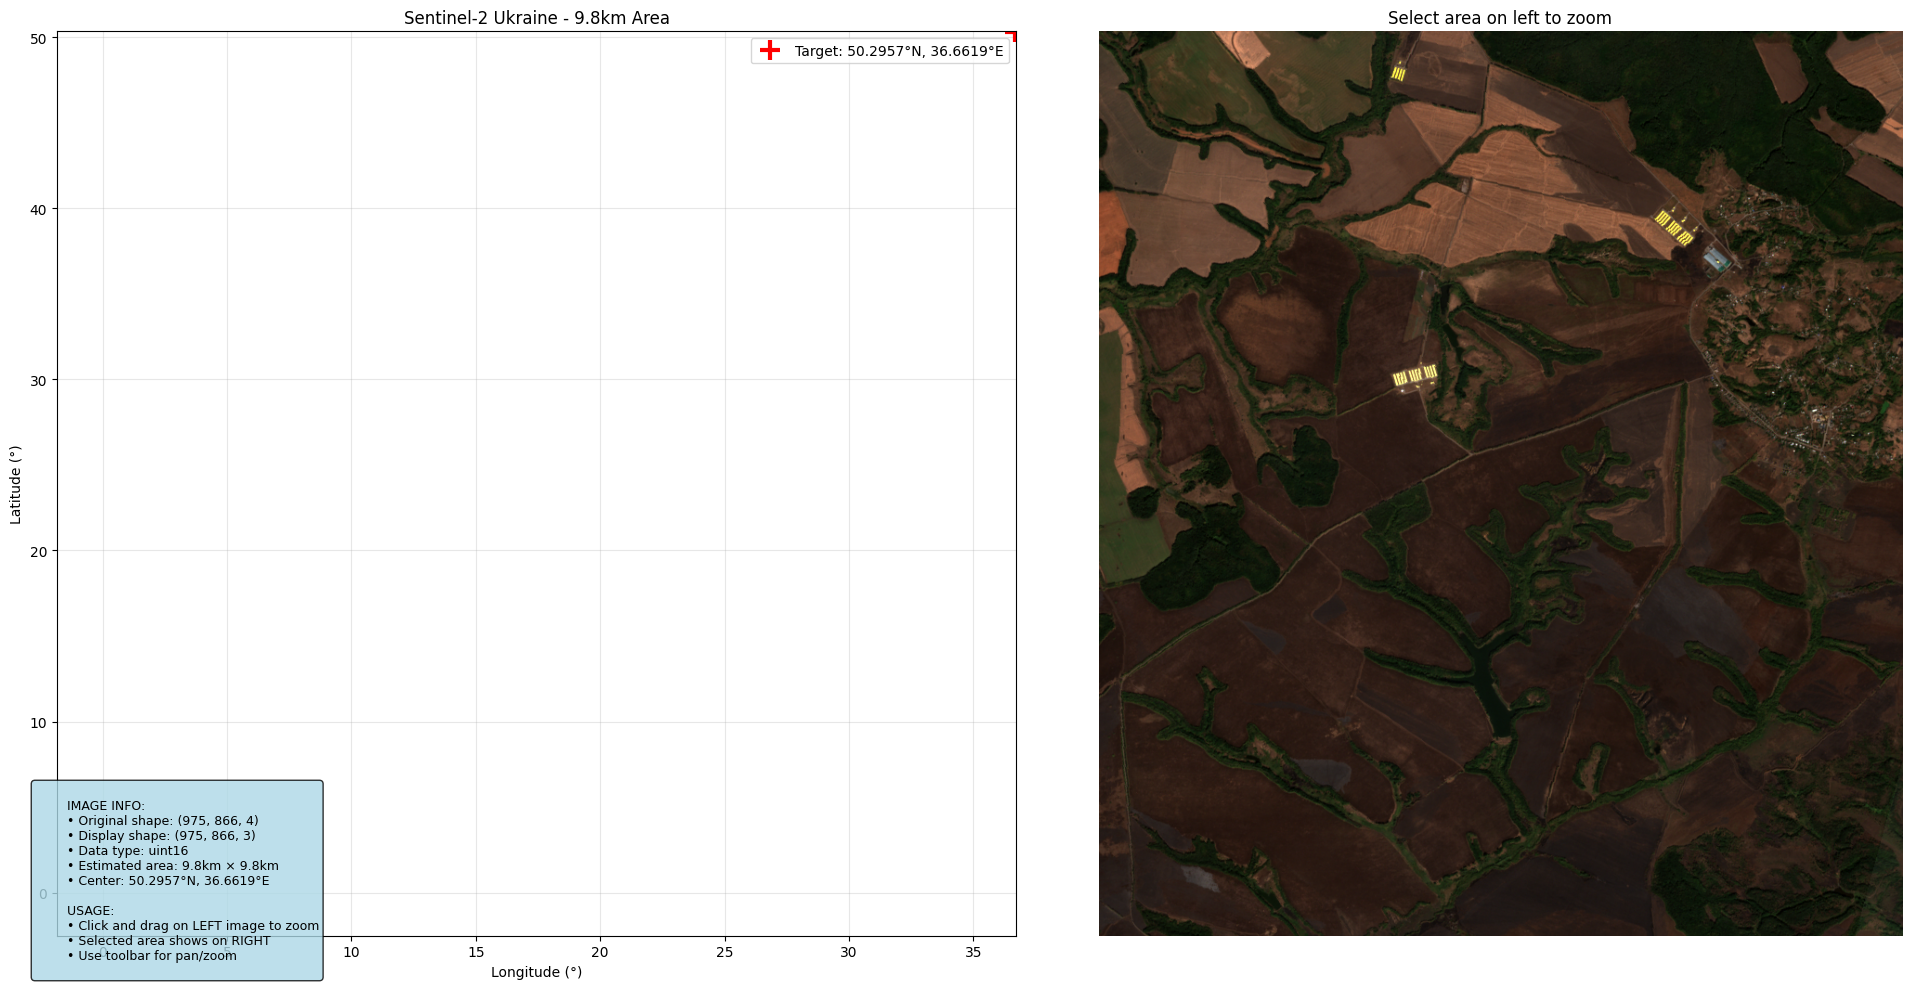

In [12]:
# Robust TIFF loader that handles Sentinel Hub TIFF files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import struct
import os

class RobustTIFFLoader:
    """
    Robust TIFF loader that can handle multi-band satellite TIFF files
    """
    
    def __init__(self, tiff_path):
        self.tiff_path = tiff_path
        self.load_tiff_data()
        self.setup_coordinates()
    
    def load_tiff_data(self):
        """Load TIFF data using multiple methods"""
        print(f"Loading TIFF: {self.tiff_path}")
        
        # Method 1: Try with PIL/Pillow
        try:
            from PIL import Image
            pil_image = Image.open(self.tiff_path)
            self.image = np.array(pil_image)
            print(f"✅ Loaded with PIL: {self.image.shape}, dtype: {self.image.dtype}")
            return
        except Exception as e:
            print(f"PIL failed: {e}")
        
        # Method 2: Try with imageio
        try:
            import imageio
            self.image = imageio.imread(self.tiff_path)
            print(f"✅ Loaded with imageio: {self.image.shape}, dtype: {self.image.dtype}")
            return
        except ImportError:
            print("imageio not available, trying next method...")
        except Exception as e:
            print(f"imageio failed: {e}")
        
        # Method 3: Try with skimage
        try:
            from skimage import io
            self.image = io.imread(self.tiff_path)
            print(f"✅ Loaded with skimage: {self.image.shape}, dtype: {self.image.dtype}")
            return
        except ImportError:
            print("skimage not available, trying next method...")
        except Exception as e:
            print(f"skimage failed: {e}")
        
        # Method 4: Try with tifffile (most robust for scientific TIFF)
        try:
            import tifffile
            self.image = tifffile.imread(self.tiff_path)
            print(f"✅ Loaded with tifffile: {self.image.shape}, dtype: {self.image.dtype}")
            return
        except ImportError:
            print("tifffile not available, trying raw read...")
        except Exception as e:
            print(f"tifffile failed: {e}")
        
        # Method 5: Raw binary read (last resort)
        try:
            self.load_raw_tiff()
            return
        except Exception as e:
            print(f"Raw read failed: {e}")
        
        raise Exception("Could not load TIFF file with any available method")
    
    def load_raw_tiff(self):
        """Load TIFF as raw binary data (basic approach)"""
        print("Attempting raw TIFF read...")
        
        with open(self.tiff_path, 'rb') as f:
            # Read TIFF header
            header = f.read(8)
            
            # Check if it's a valid TIFF
            if header[:2] in [b'II', b'MM']:  # Little or big endian
                print("✅ Valid TIFF header detected")
                
                # For simplicity, try to estimate dimensions from file size
                file_size = os.path.getsize(self.tiff_path)
                
                # Estimate square image size (this is a rough guess)
                estimated_pixels = file_size // 8  # Assume 16-bit per band, 4 bands
                estimated_size = int(np.sqrt(estimated_pixels))
                
                print(f"File size: {file_size} bytes")
                print(f"Estimated size: {estimated_size} x {estimated_size}")
                
                # Read raw data
                f.seek(0)
                raw_data = f.read()
                
                # Try to interpret as 16-bit data
                data_16bit = np.frombuffer(raw_data, dtype=np.uint16)
                
                # Try different reshapes
                for size in [estimated_size, estimated_size-1, estimated_size+1]:
                    try:
                        total_elements = size * size * 4  # 4 bands
                        if len(data_16bit) >= total_elements:
                            reshaped = data_16bit[:total_elements].reshape(size, size, 4)
                            self.image = reshaped
                            print(f"✅ Raw read successful: {self.image.shape}")
                            return
                    except:
                        continue
                
                # If reshape failed, try as 2D
                sqrt_len = int(np.sqrt(len(data_16bit)))
                self.image = data_16bit[:sqrt_len*sqrt_len].reshape(sqrt_len, sqrt_len)
                print(f"✅ Raw read as 2D: {self.image.shape}")
            else:
                raise Exception("Not a valid TIFF file")
    
    def setup_coordinates(self):
        """Setup coordinate system"""
        # Your known parameters
        center_lat, center_lon = 50.2957, 36.6619
        
        # Estimate area size from image dimensions
        if len(self.image.shape) >= 2:
            height, width = self.image.shape[:2]
            estimated_area_km = max(width, height) * 10 / 1000  # Assume 10m resolution
        else:
            estimated_area_km = 10  # Default
        
        # Calculate bounds
        offset_deg = estimated_area_km / 111.0 / 2
        
        self.bounds = [
            center_lon - offset_deg * 1.3,  # lon_min
            center_lat - offset_deg,        # lat_min  
            center_lon + offset_deg * 1.3,  # lon_max
            center_lat + offset_deg         # lat_max
        ]
        
        self.center = [center_lat, center_lon]
        self.area_km = estimated_area_km
        
        print(f"✅ Estimated area: {estimated_area_km:.1f}km")
        print(f"✅ Bounds: {self.bounds}")

class SatelliteZoomInterface:
    """
    Zoom interface for satellite images
    """
    
    def __init__(self, image_data, bounds, center, area_km):
        self.original_image = image_data
        self.bounds = bounds
        self.center = center
        self.area_km = area_km
        self.prepare_display_image()
        self.create_interface()
    
    def prepare_display_image(self):
        """Prepare image for display"""
        print(f"Preparing display image from: {self.original_image.shape}")
        
        # Handle different image formats
        if len(self.original_image.shape) == 3:
            # Multi-band image
            if self.original_image.shape[2] >= 3:
                # Use first 3 bands as RGB
                rgb_data = self.original_image[:, :, :3]
            else:
                # Duplicate single band to RGB
                rgb_data = np.stack([self.original_image[:, :, 0]] * 3, axis=-1)
        elif len(self.original_image.shape) == 2:
            # Single band - convert to RGB
            rgb_data = np.stack([self.original_image] * 3, axis=-1)
        else:
            raise ValueError(f"Unsupported image shape: {self.original_image.shape}")
        
        # Normalize for display
        if rgb_data.dtype == np.uint16:
            # 16-bit data - normalize to 8-bit
            self.display_image = (rgb_data.astype(np.float32) / 65535.0 * 255).astype(np.uint8)
        elif rgb_data.dtype in [np.float32, np.float64]:
            # Float data - assume 0-1 range
            self.display_image = (np.clip(rgb_data, 0, 1) * 255).astype(np.uint8)
        else:
            # Already 8-bit or other
            self.display_image = rgb_data.astype(np.uint8)
        
        print(f"✅ Display image ready: {self.display_image.shape}, range: {self.display_image.min()}-{self.display_image.max()}")
    
    def create_interface(self):
        """Create zoom interface"""
        
        # Create figure
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(20, 10))
        
        # Left panel - full image
        extent = [self.bounds[0], self.bounds[2], self.bounds[1], self.bounds[3]]
        self.im1 = self.ax1.imshow(self.display_image, extent=extent, aspect='auto')
        
        self.ax1.set_title(f"Sentinel-2 Ukraine - {self.area_km:.1f}km Area")
        self.ax1.set_xlabel('Longitude (°)')
        self.ax1.set_ylabel('Latitude (°)')
        self.ax1.grid(True, alpha=0.3)
        
        # Mark center
        center_lat, center_lon = self.center
        self.ax1.plot(center_lon, center_lat, 'r+', markersize=15, markeredgewidth=3,
                     label=f'Target: {center_lat:.4f}°N, {center_lon:.4f}°E')
        self.ax1.legend()
        
        # Right panel - zoom
        self.im2 = self.ax2.imshow(self.display_image)
        self.ax2.set_title("Select area on left to zoom")
        self.ax2.axis('off')
        
        # Rectangle selector
        self.selector = RectangleSelector(
            self.ax1, self.on_select,
            useblit=True,
            button=[1],
            minspanx=0.001, minspany=0.001,
            spancoords='data',
            interactive=True
        )
        
        # Info
        info = f"""
        IMAGE INFO:
        • Original shape: {self.original_image.shape}
        • Display shape: {self.display_image.shape}
        • Data type: {self.original_image.dtype}
        • Estimated area: {self.area_km:.1f}km × {self.area_km:.1f}km
        • Center: {center_lat:.4f}°N, {center_lon:.4f}°E
        
        USAGE:
        • Click and drag on LEFT image to zoom
        • Selected area shows on RIGHT
        • Use toolbar for pan/zoom
        """
        
        self.fig.text(0.02, 0.02, info, fontsize=9,
                     bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    
    def on_select(self, eclick, erelease):
        """Handle zoom selection"""
        
        # Get coordinates
        lon1, lat1 = eclick.xdata, eclick.ydata
        lon2, lat2 = erelease.xdata, erelease.ydata
        
        if None in [lon1, lat1, lon2, lat2]:
            return
        
        lon_min, lon_max = min(lon1, lon2), max(lon1, lon2)
        lat_min, lat_max = min(lat1, lat2), max(lat1, lat2)
        
        # Convert to pixels
        h, w = self.display_image.shape[:2]
        
        x1 = int((lon_min - self.bounds[0]) / (self.bounds[2] - self.bounds[0]) * w)
        x2 = int((lon_max - self.bounds[0]) / (self.bounds[2] - self.bounds[0]) * w)
        y1 = int((self.bounds[3] - lat_max) / (self.bounds[3] - self.bounds[1]) * h)
        y2 = int((self.bounds[3] - lat_min) / (self.bounds[3] - self.bounds[1]) * h)
        
        # Clamp to bounds
        x1, x2 = max(0, min(x1, x2)), min(w, max(x1, x2))
        y1, y2 = max(0, min(y1, y2)), min(h, max(y1, y2))
        
        if x2 - x1 < 5 or y2 - y1 < 5:
            return
        
        # Extract zoom
        zoomed = self.display_image[y1:y2, x1:x2]
        
        # Update display
        self.im2.set_array(zoomed)
        self.im2.set_extent([0, zoomed.shape[1], zoomed.shape[0], 0])
        
        # Calculate info
        area_w_km = (lon_max - lon_min) * 111
        area_h_km = (lat_max - lat_min) * 111
        
        title = f"ZOOM: {area_w_km:.2f} × {area_h_km:.2f} km\n"
        title += f"Coords: {lon_min:.5f}°E to {lon_max:.5f}°E\n"
        title += f"        {lat_min:.5f}°N to {lat_max:.5f}°N\n"
        title += f"Pixels: {zoomed.shape[1]} × {zoomed.shape[0]}"
        
        self.ax2.set_title(title, fontsize=10)
        self.ax2.axis('on')
        
        self.fig.canvas.draw()
        
        print(f"\n=== ZOOM INFO ===")
        print(f"Area: {area_w_km:.2f} × {area_h_km:.2f} km")
        print(f"Coords: [{lon_min:.6f}, {lat_min:.6f}, {lon_max:.6f}, {lat_max:.6f}]")
        print(f"Pixels: {zoomed.shape}")
    
    def show(self):
        """Show interface"""
        plt.tight_layout()
        plt.show()
        return self

# Main function to load and zoom
def load_and_zoom(tiff_path):
    """Load TIFF and create zoom interface"""
    
    try:
        # Load TIFF data
        loader = RobustTIFFLoader(tiff_path)
        
        # Create zoom interface
        zoomer = SatelliteZoomInterface(
            loader.image, 
            loader.bounds, 
            loader.center, 
            loader.area_km
        )
        
        print(f"\n🎯 ZOOM INTERFACE READY!")
        print("Click and drag on the LEFT image to select zoom areas!")
        
        zoomer.show()
        return zoomer
        
    except Exception as e:
        print(f"❌ Failed to load {tiff_path}: {e}")
        return None

# Try to load your TIFF file
print("=== ROBUST TIFF LOADER ===")
print("Attempting to load your satellite image...")

# First install imageio if needed (it's more robust than PIL for TIFF)
try:
    import imageio
    print("✅ imageio available")
except ImportError:
    print("Installing imageio for better TIFF support...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imageio"])
    import imageio

# Load your file
zoomer = load_and_zoom('sentinel2_ukraine_10km.tif')

if zoomer is None:
    print("\n🔧 ALTERNATIVE: If the TIFF still won't load, try:")
    print("1. Check if you have a PNG file instead:")
    png_files = [f for f in os.listdir('.') if f.endswith('.png') and 'sentinel' in f.lower()]
    if png_files:
        print(f"   Found PNG files: {png_files}")
        print(f"   Try: zoomer = load_and_zoom('{png_files[0]}')")
    
    print("2. Or use the working PNG file:")
    if os.path.exists('sentinel2_ukraine_direct_api.png'):
        print("   zoomer = load_and_zoom('sentinel2_ukraine_direct_api.png')")